In [1]:
import numpy as np
import mne
from mne.datasets import sample

In [2]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
proj_fname = data_path + '/MEG/sample/sample_audvis_eog_proj.fif'

In [3]:
# use the first 20s of data
tmin = 0
tmax = 20
# save memory by cropping the raw data before loading it.
raw = mne.io.read_raw_fif(raw_fname)
raw.crop(tmin,tmax).load_data()
raw.info['bads'] = ['MEG 2443', 'EEG 053']  # bads + 2 more
fmin, fmax = 2, 300  # look at frequencies between 2 and 300Hz
n_fft = 2048  # the FFT size (n_fft). Ideally a power of 2

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 12012  =      0.000 ...    20.000 secs...


In [4]:
# pick a subset of channels 
selection = mne.read_selection('Left-temporal')
picks = mne.pick_types(raw.info,meg='mag',eeg=False,eog=False,stim=False,exclude='bads',selection=selection)

Effective window size : 3.410 (s)


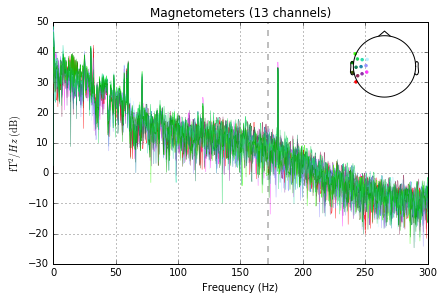

In [6]:
# Let's first check out all channel types
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks);

### Removing power-line noise with notch filtering
- Removing power-line noise can be done with a Notch filter, directly on the Raw object, specifying an array of frequency to be cut off:

Setting up band-stop filter
Filter length of 3965 samples (6.602 sec) selected
Effective window size : 3.410 (s)


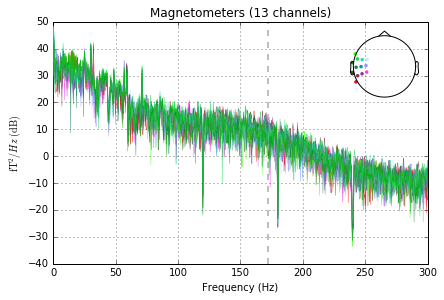

In [9]:
raw.notch_filter(np.arange(60,241,60),picks=picks,filter_length='auto',phase='zero')
raw.plot_psd(area_mode='range',tmax=10.0,picks=picks);

### Removing power-line noise with low-pass filtering
- If you’re only interested in low frequencies, below the peaks of power-line noise you can simply low pass filter the data.

Setting up low-pass filter at 50 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 159 samples (0.265 sec) selected
Effective window size : 3.410 (s)


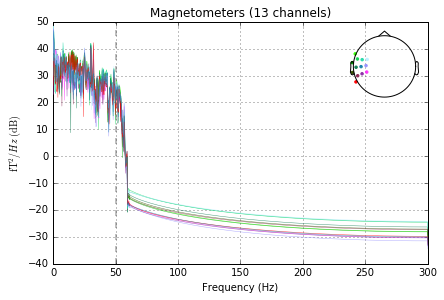

In [11]:
# low pass filtering below 50 Hz
raw.filter(None,50.,h_trans_bandwidth='auto',filter_length='auto',phase='zero')
raw.plot_psd(area_mode='range',tmax=10.0,picks=picks);

### High-pass filtering to remove slow drifts
- To remove slow drifts, you can high pass.

Setting up high-pass filter at 1 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1983 samples (3.302 sec) selected
Effective window size : 3.410 (s)


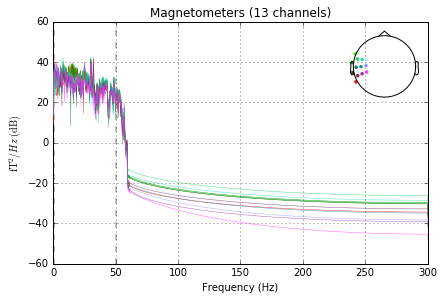

In [16]:
raw.filter(1., None, l_trans_bandwidth='auto', filter_length='auto',
           phase='zero')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks);